# Parse Audio Wav Files

In [1]:
import pandas as pd
import pathlib 

import os

import librosa
import matplotlib.pyplot as plt
import librosa.display
import IPython.display as ipd
import numpy as np
import re
import cv2
from IPython.display import Audio
from librosa import display

import skimage

In [2]:
def scale_minmax(X, min=0.0, max=1.0):
    X_std = (X - X.min()) / (X.max() - X.min())
    X_scaled = X_std * (max - min) + min
    return X_scaled

In [3]:
test_df = pd.read_csv("test_speech.csv")

In [4]:
test_df.head(1)

,Unnamed: 0,cp,fname,t,folder,speaker,w_pattern,token,start,end
0,0,cp,m/s13_bwwm7a_m.jpg,-t,test/m,s13,bwwm7a,m,28250,33000


In [5]:
temp_row = test_df.iloc[10000]
print(temp_row)

Unnamed: 0                       10000
cp                                  cp
fname         soon/s11_brwz9s_soon.jpg
t                                   -t
folder                       test/soon
speaker                            s11
w_pattern                       brwz9s
token                             soon
start                            54750
end                              67000
Name: 10000, dtype: object


In [7]:
t_path = pathlib.Path(".")

In [15]:
audio_path = str(t_path/"speech_25khz"/temp_row['speaker']/ str(temp_row['w_pattern'])) + ".wav"
out_path = t_path/"speech_25khz/"/temp_row['folder']
word_path = t_path/"speech_25khz/"/temp_row['folder']/str(temp_row['speaker'] + '_' \
                     + temp_row['w_pattern'] + '_' + temp_row['token'] +".wav")
print(audio_path)
print(out_path)
print(word_path)

In [17]:
(t_y,t_sr) = librosa.load(str(word_path),sr=None)

In [18]:
ipd.Audio(t_y, rate=t_sr) # load a NumPy array


In [19]:
mfcc = librosa.feature.mfcc(y=t_y, sr=t_sr, n_mfcc=24)


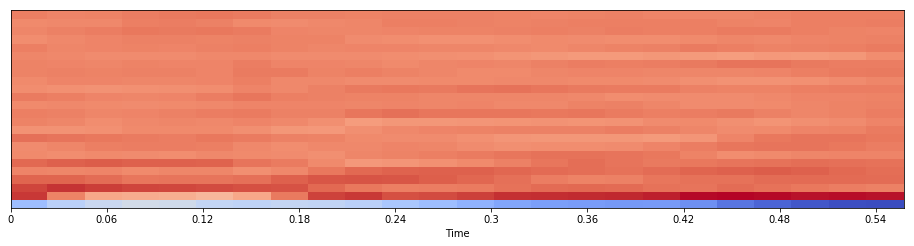

In [22]:


plt.figure(figsize=(16, 8))
plt.subplot(2, 1, 1)
display.specshow(mfcc, x_axis='time')

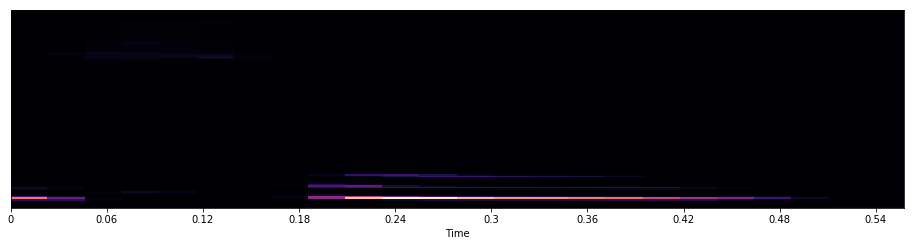

In [25]:
melspec=librosa.feature.melspectrogram(y=t_y, sr=t_sr)
plt.figure(figsize=(16, 8))
plt.subplot(2, 1, 1)
display.specshow(melspec, x_axis='time')

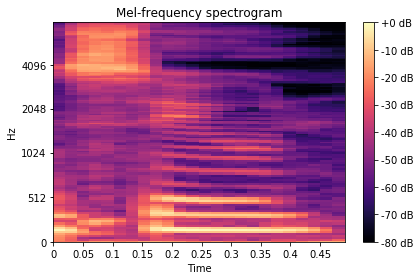

In [30]:
temp_row = test_df.iloc[10000]
word_path = t_path/"speech_25khz/"/temp_row['folder']/str(temp_row['speaker'] + '_' \
                     + temp_row['w_pattern'] + '_' + temp_row['token'] +".wav")
(t_y,t_sr) = librosa.load(str(word_path),sr=None)
melspec=librosa.feature.melspectrogram(y=t_y, sr=t_sr)
S_dB = librosa.power_to_db(melspec, ref=np.max)
librosa.display.specshow(S_dB, x_axis='time',
                         y_axis='mel', sr=t_sr,
                         fmax=8000)
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-frequency spectrogram')
plt.tight_layout()
plt.show()
ipd.Audio(t_y, rate=t_sr) # load a NumPy array


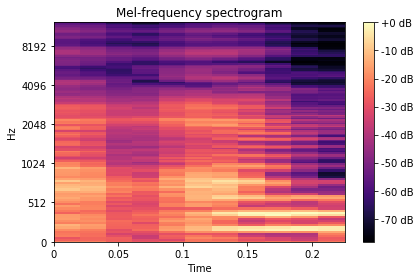

In [37]:
temp_row = test_df.iloc[100]
word_path = t_path/"speech_25khz/"/temp_row['folder']/str(temp_row['speaker'] + '_' \
                     + temp_row['w_pattern'] + '_' + temp_row['token'] +".wav")
(t_y,t_sr) = librosa.load(str(word_path),sr=None)
melspec=librosa.feature.melspectrogram(y=t_y, sr=t_sr)
S_dB = librosa.power_to_db(melspec, ref=np.max)
librosa.display.specshow(S_dB, x_axis='time',
                         y_axis='mel', sr=t_sr,
                         fmax=t_sr/2)
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-frequency spectrogram')
plt.tight_layout()
plt.show()
ipd.Audio(t_y, rate=t_sr) # load a NumPy array


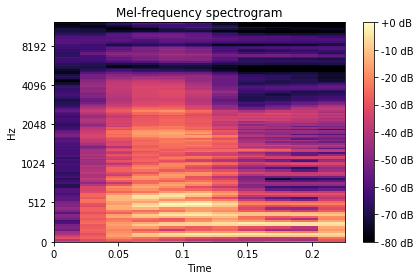

In [38]:
temp_row = test_df.iloc[44]
word_path = t_path/"speech_25khz/"/temp_row['folder']/str(temp_row['speaker'] + '_' \
                     + temp_row['w_pattern'] + '_' + temp_row['token'] +".wav")
(t_y,t_sr) = librosa.load(str(word_path),sr=None)
melspec=librosa.feature.melspectrogram(y=t_y, sr=t_sr)
S_dB = librosa.power_to_db(melspec, ref=np.max)
librosa.display.specshow(S_dB, x_axis='time',
                         y_axis='mel', sr=t_sr,
                         fmax=t_sr/2)
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-frequency spectrogram')
plt.tight_layout()
plt.show()
ipd.Audio(t_y, rate=t_sr) # load a NumPy array


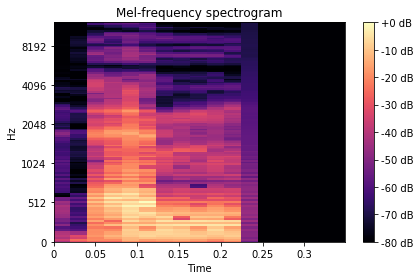

In [114]:
t_win =  (15/1000)
t_yfixed = librosa.util.fix_length(t_y, int(t_sr*(1/3)))
# melspec=librosa.feature.melspectrogram(y=t_yfixed, sr=t_sr,n_fft=512)
melspec=librosa.feature.melspectrogram(y=t_yfixed, sr=t_sr,win_length=int(t_sr*t_win),n_fft=512)
S_dB = librosa.power_to_db(melspec, ref=np.max)
librosa.display.specshow(S_dB, x_axis='time',
                         y_axis='mel', sr=t_sr,
                         fmax=t_sr/2)
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-frequency spectrogram')
plt.tight_layout()
plt.show()
ipd.Audio(t_y, rate=t_sr) # load a NumPy array


In [9]:
def scale_minmax(X, min=0.0, max=1.0):
    X_std = (X - X.min()) / (X.max() - X.min())
    X_scaled = X_std * (max - min) + min
    return X_scaled
# min-max scale to fit inside 8-bit range
# mels = np.log(t_yfixed + 1e-9) # add small number to avoid log(0)

In [8]:
img = scale_minmax(S_dB, 0, 255).astype(np.uint8)
img = np.flip(img, axis=0) # put low frequencies at the bottom in image
img = 255-img # invert. m

NameError: name 'S_dB' is not defined

In [117]:
img

array([[255, 255, 201, ..., 255, 255, 255],
       [255, 255, 202, ..., 255, 255, 255],
       [255, 255, 236, ..., 255, 255, 255],
       ...,
       [133, 111,  65, ..., 255, 255, 255],
       [115,  78,  64, ..., 255, 255, 255],
       [136,  99,  86, ..., 255, 255, 255]], dtype=uint8)

In [127]:
test_image = skimage.color.gray2rgb(img)

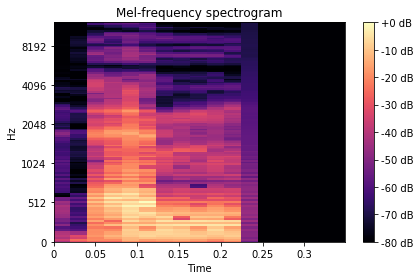

In [124]:
librosa.display.specshow(, x_axis='time',
                         y_axis='mel', sr=t_sr,
                         fmax=t_sr/2)
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-frequency spectrogram')
plt.tight_layout()
plt.show()

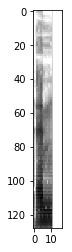

In [136]:
plt.imshow(test_image)

True

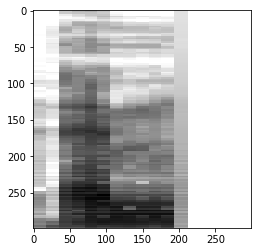

In [140]:
res = cv2.resize(test_image,dsize=(299, 299), interpolation = cv2.INTER_NEAREST)
plt.imshow(res)
cv2.imwrite("temp_out.jpg", res)


In [141]:
pwd

'/home/jupyter/labidub/dataset'

# Process Wav to Images

In [6]:
test_df = pd.read_csv("test_speech.csv")
t_path = pathlib.Path(".")

In [7]:
for i in range(len(test_df)):
    temp_row = test_df.iloc[i]
    word_path = t_path/"speech_mel/"/temp_row['folder']/str(temp_row['speaker'] + '_' \
                         + temp_row['w_pattern'] + '_' + temp_row['token'] +".wav")
    wav_path = t_path/"speech_mel/"/temp_row['folder']/str(temp_row['speaker'] + '_' \
                         + temp_row['w_pattern'] + '_' + temp_row['token'] +".jpg")
    (t_y,t_sr) = librosa.load(str(word_path),sr=None)
    melspec=librosa.feature.melspectrogram(y=t_y, sr=t_sr)
    S_dB = librosa.power_to_db(melspec, ref=np.max)

    img = scale_minmax(S_dB, 0, 255).astype(np.uint8)
    img = np.flip(img, axis=0) # put low frequencies at the bottom in image
    img = 255-img # invert. m
    test_image = skimage.color.gray2rgb(img)    
    res = cv2.resize(test_image,dsize=(299, 299), interpolation = cv2.INTER_NEAREST)
    cv2.imwrite(str(wav_path), res)    
#     print(wav_path)
#     break

In [9]:
train_df = pd.read_csv("train_speech.csv")
t_path = pathlib.Path(".")
for i in range(len(train_df)):
    temp_row = train_df.iloc[i]
    word_path = t_path/"speech_mel/"/temp_row['folder']/str(temp_row['speaker'] + '_' \
                         + temp_row['w_pattern'] + '_' + temp_row['token'] +".wav")
    wav_path = t_path/"speech_mel/"/temp_row['folder']/str(temp_row['speaker'] + '_' \
                         + temp_row['w_pattern'] + '_' + temp_row['token'] +".jpg")
    (t_y,t_sr) = librosa.load(str(word_path),sr=None)
    melspec=librosa.feature.melspectrogram(y=t_y, sr=t_sr)
    S_dB = librosa.power_to_db(melspec, ref=np.max)

    img = scale_minmax(S_dB, 0, 255).astype(np.uint8)
    img = np.flip(img, axis=0) # put low frequencies at the bottom in image
    img = 255-img # invert. m
    test_image = skimage.color.gray2rgb(img)    
    res = cv2.resize(test_image,dsize=(299, 299), interpolation = cv2.INTER_NEAREST)
    cv2.imwrite(str(wav_path), res)    
#  

# Process Noisy Wav


In [12]:
import numpy as np
import matplotlib.pyplot as plt
def compute_power_to_db(input_xwatts=None):
    sig_avg_watts = np.mean(input_xwatts)
    sig_avg_db = 10 * np.log10(sig_avg_watts)
    return sig_avg_db

def compute_watts(input_sig_volts=None):
    return input_sig_volts ** 2

# Calculate noise according to [2] then convert to watts
def calculate_noise(input_sig_volts=None,
                    input_snr = 10):
    t_sig_watts=compute_watts(input_sig_volts)
    t_sig_db = compute_power_to_db(t_sig_watts)
    noise_avg_db = t_sig_db - input_snr
    noise_avg_watts = 10 ** (noise_avg_db / 10)
    # Generate an sample of white noise
    mean_noise = 0
    noise_volts = np.random.normal(mean_noise, np.sqrt(noise_avg_watts), len(t_sig_watts))
    # Noise up the original signal
    out_noisy_sig = input_sig_volts + noise_volts
    return out_noisy_sig


In [14]:
# train_df = pd.read_csv("train_speech.csv")
# t_path = pathlib.Path(".")
train_df = pd.read_csv("test_speech.csv")
t_path = pathlib.Path(".")

In [23]:
train_df = pd.read_csv("test_speech.csv")
t_path = pathlib.Path(".")
for i in range(len(train_df)):
    temp_row = train_df.iloc[i]
    word_path = t_path/"speech_25khz/"/temp_row['folder']/str(temp_row['speaker'] + '_' \
                         + temp_row['w_pattern'] + '_' + temp_row['token'] +".wav")
    wav_path = t_path/"speech_mel_noisy/"/temp_row['folder']/str(temp_row['speaker'] + '_' \
                         + temp_row['w_pattern'] + '_' + temp_row['token'] +".jpg")
    out_path = t_path/"speech_noisy/"/temp_row['folder']/str(temp_row['speaker'] + '_' \
                         + temp_row['w_pattern'] + '_' + temp_row['token'] +".wav")

    (t_y,t_sr) = librosa.load(str(word_path),sr=None)
    noisy_wav=calculate_noise(input_sig_volts=t_y,input_snr=10)
    melspec=librosa.feature.melspectrogram(y=noisy_wav, sr=t_sr)
    S_dB = librosa.power_to_db(melspec, ref=np.max)

    img = scale_minmax(S_dB, 0, 255).astype(np.uint8)
    img = np.flip(img, axis=0) # put low frequencies at the bottom in image
    img = 255-img # invert. m
    test_image = skimage.color.gray2rgb(img)    
    res = cv2.resize(test_image,dsize=(299, 299), interpolation = cv2.INTER_NEAREST)
    cv2.imwrite(str(wav_path), res)    
    librosa.output.write_wav(str(out_path), noisy_wav, t_sr)


In [24]:
train_df = pd.read_csv("train_speech.csv")
for i in range(len(train_df)):
    temp_row = train_df.iloc[i]
    word_path = t_path/"speech_25khz/"/temp_row['folder']/str(temp_row['speaker'] + '_' \
                         + temp_row['w_pattern'] + '_' + temp_row['token'] +".wav")
    wav_path = t_path/"speech_mel_noisy/"/temp_row['folder']/str(temp_row['speaker'] + '_' \
                         + temp_row['w_pattern'] + '_' + temp_row['token'] +".jpg")
    out_path = t_path/"speech_noisy/"/temp_row['folder']/str(temp_row['speaker'] + '_' \
                         + temp_row['w_pattern'] + '_' + temp_row['token'] +".wav")

    (t_y,t_sr) = librosa.load(str(word_path),sr=None)
    noisy_wav=calculate_noise(input_sig_volts=t_y,input_snr=10)
    melspec=librosa.feature.melspectrogram(y=noisy_wav, sr=t_sr)
    S_dB = librosa.power_to_db(melspec, ref=np.max)

    img = scale_minmax(S_dB, 0, 255).astype(np.uint8)
    img = np.flip(img, axis=0) # put low frequencies at the bottom in image
    img = 255-img # invert. m
    test_image = skimage.color.gray2rgb(img)    
    res = cv2.resize(test_image,dsize=(299, 299), interpolation = cv2.INTER_NEAREST)
    cv2.imwrite(str(wav_path), res)    
    librosa.output.write_wav(str(out_path), noisy_wav, t_sr)


In [15]:
train_df.head()

,Unnamed: 0,cp,fname,t,folder,speaker,w_pattern,token,start,end
0,0,cp,m/s29_sgbm9a_m.jpg,-t,train/m,s29,sgbm9a,m,38000,46000
1,1,cp,m/s27_prim5s_m.jpg,-t,train/m,s27,prim5s,m,30000,34500
2,2,cp,m/s29_srwm1a_m.jpg,-t,train/m,s29,srwm1a,m,32500,38500
3,3,cp,m/s19_srbm6p_m.jpg,-t,train/m,s19,srbm6p,m,32250,38750
4,4,cp,m/s28_prim5p_m.jpg,-t,train/m,s28,prim5p,m,31250,36500


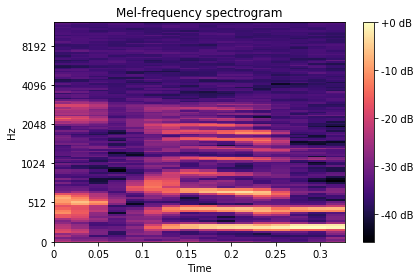

In [20]:
word_path = "speech_noisy/train/m/s29_sgbm9a_m.wav"
(t_y,t_sr) = librosa.load(str(word_path),sr=None)
melspec=librosa.feature.melspectrogram(y=t_y, sr=t_sr)
S_dB = librosa.power_to_db(melspec, ref=np.max)
librosa.display.specshow(S_dB, x_axis='time',
                         y_axis='mel', sr=t_sr,
                         fmax=t_sr/2)
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-frequency spectrogram')
plt.tight_layout()
plt.show()
ipd.Audio(t_y, rate=t_sr) # load a NumPy array

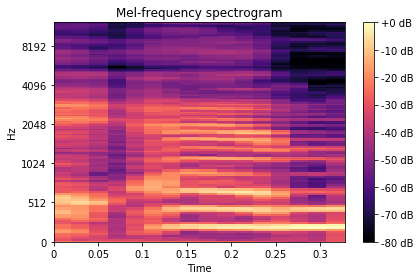

In [21]:
word_path = "speech_25khz/train/m/s29_sgbm9a_m.wav"
(t_y,t_sr) = librosa.load(str(word_path),sr=None)
melspec=librosa.feature.melspectrogram(y=t_y, sr=t_sr)
S_dB = librosa.power_to_db(melspec, ref=np.max)
librosa.display.specshow(S_dB, x_axis='time',
                         y_axis='mel', sr=t_sr,
                         fmax=t_sr/2)
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-frequency spectrogram')
plt.tight_layout()
plt.show()
ipd.Audio(t_y, rate=t_sr) # load a NumPy array